# Assignment_2

# Part 1: SVM

### Use the following function to plot the classification regions

In [13]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure(figsize=(6, 6))
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [14]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features = 2,
                                n_redundant = 0, n_informative = 2,
                                n_clusters_per_class = 1, flip_y = 0.1,
                                class_sep = 0.5, random_state = 0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)


#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

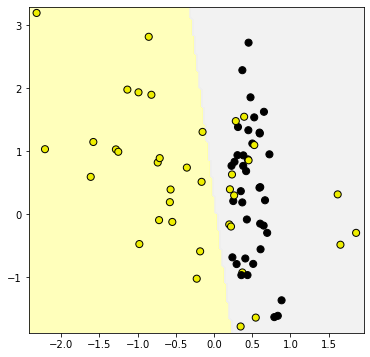

In [16]:
from sklearn.svm import LinearSVC, SVC

SVM_classifier = SVC(kernel = 'linear')

SVM_classifier.fit(X_train, y_train)

plot_class_regions_for_classifier(SVM_classifier, X_train, y_train)


#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00001.
2. Train another SVM classifier using linear kernel with C=100
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

C:\Users\Pavilion\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


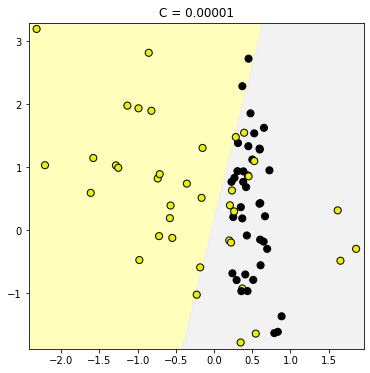

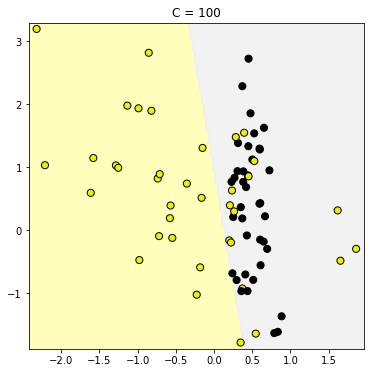

In [17]:
SVM_1 = LinearSVC(C = 0.00001)
SVM_1.fit(X_train,y_train)

SVM_2 = LinearSVC(C = 100)
SVM_2.fit(X_train,y_train)

plot_class_regions_for_classifier(SVM_1, X_train, y_train, title='C = 0.00001')
plot_class_regions_for_classifier(SVM_2, X_train, y_train, title='C = 100')


The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. 
For large values of C (C = 100), the optimization will choose a smaller-margin hyperplane.
A very small value of C (C = 0.00001) will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. 
For very tiny values of C, we get misclassified examples

### Use the fruits dataset in questions 4, 5, 6.

In [18]:
import pandas as pd
fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import LinearSVC

X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']

X_fruits_WH = X_fruits[['width', 'height']]
X_fruits_train, X_fruits_test, y_fruits_train, y_fruits_test = train_test_split(X_fruits_WH, y_fruits, test_size = 0.25, random_state = 0)

fruit_SVM_clf = LinearSVC()
fruit_SVM_clf.fit(X_fruits_train,y_fruits_train)

C:\Users\Pavilion\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

4 models have been trained since we have 4 classes (labels)

In [20]:
print('Coefficients = ',fruit_SVM_clf.coef_)
print('Intercepts = ',fruit_SVM_clf.intercept_)
# np.asarray(X_fruits_train)

Coefficients =  [[ 0.46800456 -0.27907099]
 [ 0.78974769 -1.10779815]
 [ 0.20142264 -0.03350196]
 [-1.26190942  1.01087381]]
Intercepts =  [-1.49944872  0.78674841 -1.64085151  0.37222816]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

[2 2 2 ... 1 1 1]


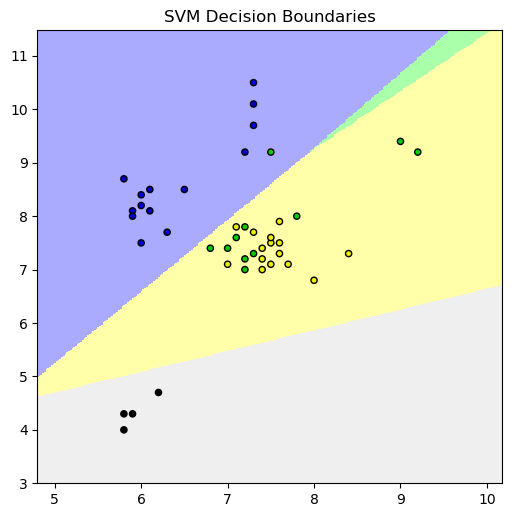

In [21]:

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap( ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#EEEE00', '#000000', '#00CC00', '#0000CC'])


#generating the domain we will plot and making predictions for every point in a mesh of that domain
x_min, x_max = np.asarray(X_fruits_train)[:, 0].min() - 1, np.asarray(X_fruits_train)[:, 0].max() + 1
y_min, y_max = np.asarray(X_fruits_train)[:, 1].min() - 1, np.asarray(X_fruits_train)[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = fruit_SVM_clf.predict(np.c_[xx.ravel(), yy.ravel()])

#now let's make the plot, to do so we first have to reshape Z, which is just a 1 array, to match the shape of xx and yy
#then plot the color coded mesh
print(Z)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(6, 6), dpi=100)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#also plot the training points
plt.scatter(np.asarray(X_fruits_train)[:, 0], np.asarray(X_fruits_train)[:, 1], c=np.asarray(y_fruits_train), cmap=cmap_bold,
                edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Decision Boundaries")

plt.show()

# plot_class_regions_for_classifier(fruit_SVM_clf, np.asarray(X_fruits_train),np.asarray(y_fruits_train), title='SVM Decision Boundaries', plot_decision_regions = True)


from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)### Use the breast cancer dataset in question 7, 8, and9.

In [22]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 

X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, test_size = 0.25, random_state = 0)

parameters = {'kernel' : ['rbf'], 'C':[10, 0.01, 0.1, 0.5, 1]}
grid = GridSearchCV(svm.SVC(), parameters, refit = True, verbose = 3)
 
grid.fit(X_cancer_train, y_cancer_train)

print(grid.best_params_)
 

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.627, total=   0.0s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.627, total=   0.0s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.627, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.627, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.627, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.627, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ............

C:\Users\Pavilion\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Pavilion\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Pavilion\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "

#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [25]:
from sklearn.metrics import accuracy_score

cancer_SVM_clf = svm.SVC(C = 10, kernel='rbf')
cancer_SVM_clf.fit(X_cancer_train,y_cancer_train)

y_pred_train = cancer_SVM_clf.predict(X_cancer_train)
print('Traning accuracy score : {0:0.4f}'. format(accuracy_score(y_cancer_train, y_pred_train)))

predictions = cancer_SVM_clf.predict(X_cancer_test)
print('Testing  accuracy score : {0:0.4f}'. format(accuracy_score(y_cancer_test, predictions)))

Traning accuracy score : 1.0000
Testing  accuracy score : 0.6294


C:\Users\Pavilion\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [26]:
# Feature Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_cancer)
normalized_X_cancer = scaler.transform(X_cancer)

X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(normalized_X_cancer, y_cancer, test_size = 0.25, random_state = 0)

cancer_SVM_clf = svm.SVC(C = 10, kernel='rbf')
cancer_SVM_clf.fit(X_cancer_train,y_cancer_train)

y_pred_train = cancer_SVM_clf.predict(X_cancer_train)
print('Traning accuracy after Normalization score : {0:0.4f}'. format(accuracy_score(y_cancer_train, y_pred_train)))

predictions = cancer_SVM_clf.predict(X_cancer_test)
print('Testing  accuracy after Normalization score : {0:0.4f}'. format(accuracy_score(y_cancer_test, predictions)))

Traning accuracy after Normalization score : 0.9765
Testing  accuracy after Normalization score : 0.9580


C:\Users\Pavilion\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Part 2: Decision Tree

#### Use the iris dataset in the remaining questions

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)


### Question 1
1. Train a decision tree with default parameters.
2. Print the training and testing accuracy.
3. Comment on the results.

In [28]:
from sklearn.tree import DecisionTreeClassifier

# 1
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train )

# 2
y_pred_train = tree_clf.predict(X_train)
print('Traning accuracy score : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

predictions = tree_clf.predict(X_test)
print('Testing  accuracy score : {0:0.4f}'. format(accuracy_score(y_test, predictions)))

Traning accuracy score : 1.0000
Testing  accuracy score : 0.9474


Training accuracy is 100% which means we have Overfitting  

### Question 2
1. Set maximum depth to 3 and train a decision tree classifier.
2. Print the training and testing accuracies.
3. Comment on the results.

In [29]:
tree_clf = DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train, y_train )

y_pred_train = tree_clf.predict(X_train)
print('Traning accuracy score : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

predictions = tree_clf.predict(X_test)
print('Testing  accuracy score : {0:0.4f}'. format(accuracy_score(y_test, predictions)))


Traning accuracy score : 0.9821
Testing  accuracy score : 0.9737


A balanced model 
with maximum depth = 3 prevented overfitting 

### Question 3
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

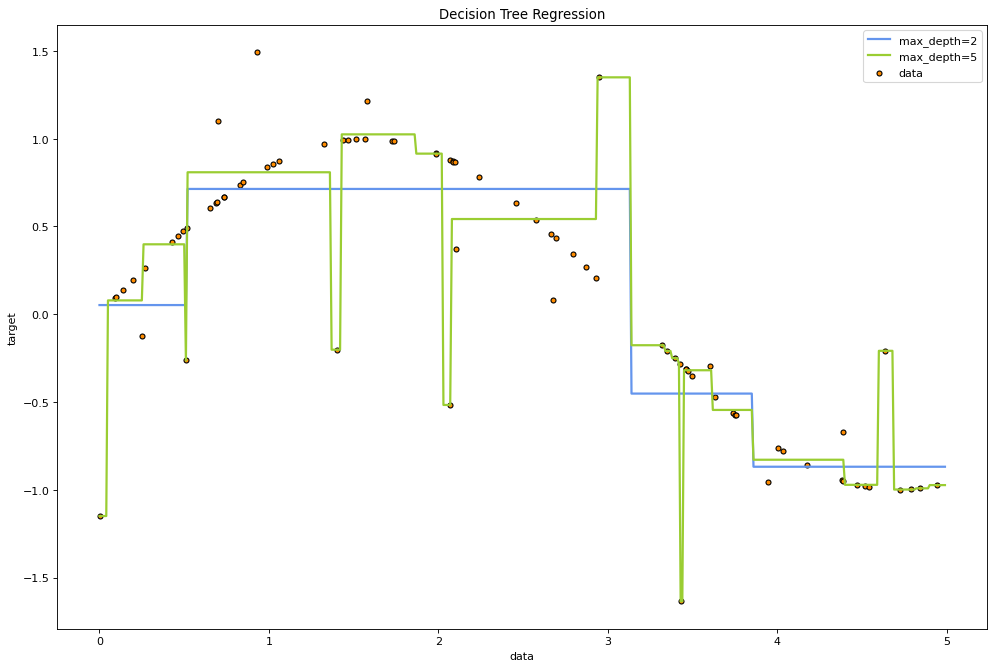

In [56]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Maximum depth of 5 (overfitting), 
Maximum depth of 2 (underfitting)

The model with maximum depth of 5 has a higher variance error because of tthe overfitting it focuses on training data and does not generalize the data which it didn’t see before.

The model with maximum depth to 2 has a higher bias error because of the underfitting it doesn't focus much on training data and it oversimplifies the model.